<a href="https://colab.research.google.com/github/ItzhakGeller/MyFirstGitHubRepo/blob/main/03_computer_vision_and_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to computer vision and CNN in tensorflow

#Get the data

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from zipfile import ZipFile
import numpy as np
import pandas as pd


# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-03 20:32:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   191MB/s    in 0.5s    

2022-08-03 20:32:21 (191 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

In [ ]:
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("In {} folder, there are folders: {} and number of files is: {}".format(dirpath, dirnames, len(filenames)))

In pizza_steak folder, there are folders: ['test', 'train'] and number of files is: 0
In pizza_steak/test folder, there are folders: ['pizza', 'steak'] and number of files is: 0
In pizza_steak/test/pizza folder, there are folders: [] and number of files is: 250
In pizza_steak/test/steak folder, there are folders: [] and number of files is: 250
In pizza_steak/train folder, there are folders: ['pizza', 'steak'] and number of files is: 0
In pizza_steak/train/pizza folder, there are folders: [] and number of files is: 750
In pizza_steak/train/steak folder, there are folders: [] and number of files is: 750


#So it looks like the data contains 750 pictures of steak \ pizza for training and 250 of each for testing

#One more way to ghet number of files in directory


In [ ]:
files_steak_in_train = os.listdir("pizza_steak/train/steak")
len(files_steak_in_train)

750

#create a function to visualize the data

In [ ]:
import matplotlib.image as mpimg
#let's create a function that plots a picture of a random picture
def plot_images(folder,food_class):
  Path = folder + '/' + food_class
  rand_pic = random.choice(os.listdir(Path))
  #Let's plot the image
  image = mpimg.imread(Path +"/"+ rand_pic)
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.title("{} \n {}".format(rand_pic[:-4],image.shape))


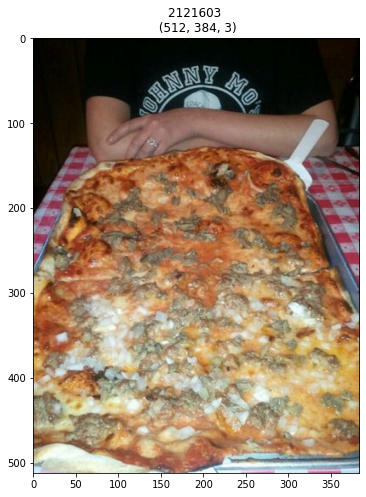

In [ ]:
plot_images(folder="pizza_steak/train",food_class="pizza")

#Create a model
steps:
1. process the data so it can be fed to the model:

   a. nromalization (data values 0<x<1)

   b. create an instance of datagenerator that will get the data from the   folders, apply maniplations on it annd feed it to the model
   
2. create a model and define the paramters
3. fit the model
4. evaluate the model

Let's go!

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


 What needs to be don is to create an object that will:
 a. rescale the data
 b. change the figuge dimensions to reduce dimensionaliy
 c. create batches for test and train data

In [ ]:
train_datagen = ImageDataGenerator(
                                  rescale=1/255.,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

                                                         

In [ ]:
train_data = train_datagen.flow_from_directory("pizza_steak/train",
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    seed = 42, #need to create same splitting for all tested models
                                                    subset="training")

validation_data = train_datagen.flow_from_directory("pizza_steak/train",
                                                    seed=42,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset="validation")
test_data = test_datagen.flow_from_directory("pizza_steak/test",
                                             target_size=(150,150),
                                             batch_size = 8,
                                             class_mode="binary")

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Let's create a model
CNN_model_1 = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(input_shape=(150,150,3),
                                     filters=10,
                                     kernel_size=3,
                                     activation="relu"),
              tf.keras.layers.Conv2D(10,3,
                                     activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(1,activation="sigmoid")

                                      ])
CNN_model_1.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])                                      

In [ ]:
 #Let's train the model:

history_1 = CNN_model_1.fit(train_data,                            
                          validation_data=validation_data,
                          steps_per_epoch=len(train_data),
                          validation_steps=len(validation_data),
                 epochs=5
                  )

Epoch 1/5
38/38 [==============================] - 22s 173ms/step - loss: 0.6160 - accuracy: 0.6583 - val_loss: 0.6179 - val_accuracy: 0.6633
Epoch 2/5
38/38 [==============================] - 6s 159ms/step - loss: 0.4602 - accuracy: 0.7958 - val_loss: 0.5329 - val_accuracy: 0.7467
Epoch 3/5
38/38 [==============================] - 6s 160ms/step - loss: 0.4207 - accuracy: 0.8192 - val_loss: 0.4754 - val_accuracy: 0.7967
Epoch 4/5
38/38 [==============================] - 6s 160ms/step - loss: 0.3792 - accuracy: 0.8275 - val_loss: 0.5071 - val_accuracy: 0.7833
Epoch 5/5
38/38 [==============================] - 7s 180ms/step - loss: 0.3791 - accuracy: 0.8417 - val_loss: 0.5028 - val_accuracy: 0.7700


In [ ]:
def plot_model_performance(history):
  df = pd.DataFrame(history.history)
  df[['loss','val_loss']].plot()
  plt.figure()
  df[['accuracy','val_accuracy']].plot()


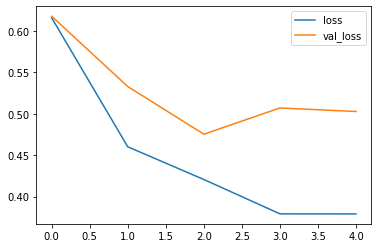

<Figure size 432x288 with 0 Axes>

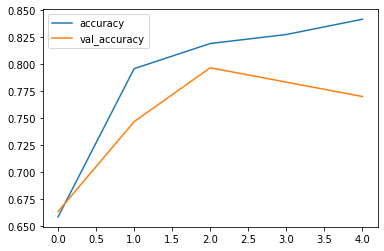

In [ ]:
plot_model_performance(history_1)

In [ ]:
CNN_model_1.evaluate(test_data)

63/63 [==============================] - 2s 34ms/step - loss: 0.3768 - accuracy: 0.8380


[0.3767955005168915, 0.8379999995231628]

The model pefromes bettet than guessing (50%) but the accuracy is not good enough. Let's try changing architecture to achieve better results

First try: increase number of pixels in each photo to 200x200

In [ ]:
train_path = "pizza_steak/train"
test_path="pizza_steak/test"
train_data=train_datagen.flow_from_directory(train_path,
                                             target_size=(200,200),
                                             seed=42,
                                             batch_size=32,
                                             class_mode="binary",
                                             subset="training")
validation_data = train_datagen.flow_from_directory(train_path,
                                                    target_size=(200,200),
                                                    seed=42,
                                                    class_mode="binary",
                                                    subset="validation",
                                                    batch_size=32)
test_data=test_datagen.flow_from_directory(test_path,
                                           target_size=(200,200),
                                           batch_size=8,
                                           seed=42,
                                           class_mode="binary")


                         

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#let's create model number 2
model_CNN_2 = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(input_shape=(200,200,3),
                                     filters=10,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),

              tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),

              tf.keras.layers.Conv2D(10,3,activation="relu"),

              tf.keras.layers.Conv2D(10,3,activation="relu"),

              tf.keras.layers.MaxPooling2D(pool_size=2,padding="valid"),

              tf.keras.layers.Flatten(),
              
              tf.keras.layers.Dense(1,activation="sigmoid")
])

model_CNN_2.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])
              


In [ ]:
history_2 = model_CNN_2.fit(train_data,
                            validation_data=validation_data,
                            steps_per_epoch=len(train_data),
                            validation_steps=len(validation_data),
                            epochs=5)

Epoch 1/5
38/38 [==============================] - 8s 184ms/step - loss: 0.6811 - accuracy: 0.6100 - val_loss: 0.5943 - val_accuracy: 0.7233
Epoch 2/5
38/38 [==============================] - 7s 173ms/step - loss: 0.5041 - accuracy: 0.7717 - val_loss: 0.5316 - val_accuracy: 0.7533
Epoch 3/5
38/38 [==============================] - 7s 174ms/step - loss: 0.4410 - accuracy: 0.7967 - val_loss: 0.5195 - val_accuracy: 0.7733
Epoch 4/5
38/38 [==============================] - 7s 175ms/step - loss: 0.4020 - accuracy: 0.8258 - val_loss: 0.5108 - val_accuracy: 0.7733
Epoch 5/5
38/38 [==============================] - 7s 174ms/step - loss: 0.4125 - accuracy: 0.8125 - val_loss: 0.5033 - val_accuracy: 0.7667


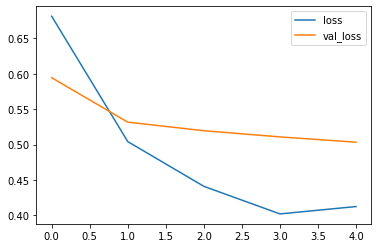

<Figure size 432x288 with 0 Axes>

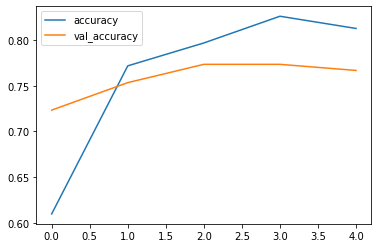

In [ ]:
plot_model_performance(history_2)

In [ ]:
model_CNN_2.evaluate(test_data)

63/63 [==============================] - 2s 36ms/step - loss: 0.3801 - accuracy: 0.8400


[0.3801009953022003, 0.8399999737739563]

Let's try to visualize what augmentation does to a picture

In [ ]:
train_augmented_datagen = ImageDataGenerator(rotation_range=0.3,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             brightness_range=None,
                                             shear_range=0.2, 
                                             zoom_range=0.2,
                                             channel_shift_range=0.2,
                                             fill_mode='nearest',
                                             cval=0.0,
                                             horizontal_flip=False,
                                             vertical_flip=False,
                                             rescale=1/255.)    

train_non_augmented_datagen = ImageDataGenerator(rotation_range=0.0,
                                             width_shift_range=0.0,
                                             height_shift_range=0.0,
                                             brightness_range=None,
                                             shear_range=0.0, 
                                             zoom_range=0.0,
                                             channel_shift_range=0.0,
                                             fill_mode='nearest', cval=0.0,
                                             horizontal_flip=False,
                                             vertical_flip=False,
                                             rescale=1/255.)    
                                             

In [ ]:
train_augmented_data = train_augmented_datagen.flow_from_directory("pizza_steak/train",
                                                                    target_size=(200, 200),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=True,
                                                                   seed=42
                                                                    )
train_non_augmented_data = train_non_augmented_datagen.flow_from_directory("pizza_steak/train",
                                                                    target_size=(200, 200),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=True,
                                                                    seed=42
                                                                    )
test_data = train_non_augmented_datagen.flow_from_directory("pizza_steak/test",
                                                                    target_size=(200, 200),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=True,
                                                                    seed=42
                                                                    )
    

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
X_augmented,_ = train_augmented_data.next()
X_not_augmented,_ = train_non_augmented_data.next()
len(X_augmented)

32

In [ ]:

def plot_augmented_vs_not(non_augmented_data,augmented_data):
  figsize=(10,8)
  import random
  num = random.randint(0,len(non_augmented_data))
  print(num)
  plt.figure(figsize=figsize)
  plt.subplot(1,2,1)
  plt.imshow(non_augmented_data[num])
  plt.title("Not augmented")
  plt.subplot(1,2,2)
  plt.imshow(augmented_data[num])
  plt.title("Augmented")



2


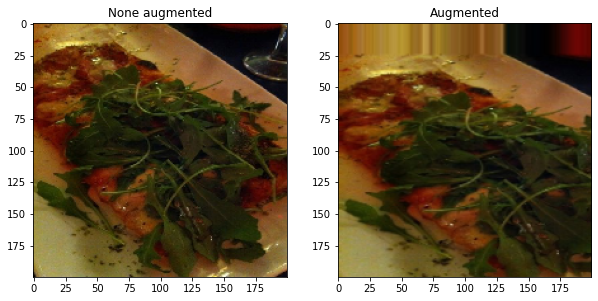

In [ ]:
plot_augmented_vs_not(X_not_augmented,X_augmented)

Let's see of this improves model learning

In [ ]:
model_CNN_3 = model_CNN_2
model_CNN_3.compile(loss="binary_crossentropy",
                    metrics = ["accuracy"],
                    optimizer="adam")

In [ ]:
history_3 = model_CNN_3.fit(train_augmented_data,
                            validation_data = test_data,
                            steps_per_epoch=len(train_augmented_data),
                            validation_steps = len(test_data),
                            epochs=5)

Epoch 1/5
47/47 [==============================] - 23s 471ms/step - loss: 0.5504 - accuracy: 0.7253 - val_loss: 0.3648 - val_accuracy: 0.8560
Epoch 2/5
47/47 [==============================] - 20s 426ms/step - loss: 0.5274 - accuracy: 0.7387 - val_loss: 0.3718 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4843 - accuracy: 0.7640 - val_loss: 0.3412 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 20s 429ms/step - loss: 0.4630 - accuracy: 0.7920 - val_loss: 0.3220 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4692 - accuracy: 0.7860 - val_loss: 0.2938 - val_accuracy: 0.8920


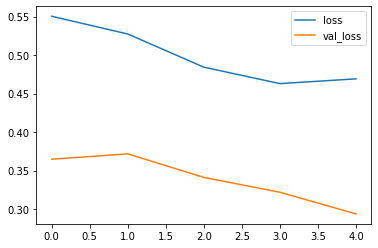

<Figure size 432x288 with 0 Axes>

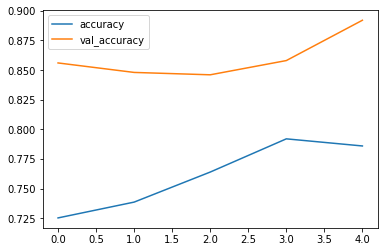

In [ ]:
plot_model_performance(history_3)

In [ ]:
#It seems like more traiing can do good to the model learning patterns, increase Epochs!

In [ ]:
model_CNN_4 = model_CNN_2
model_CNN_4.compile(loss="binary_crossentropy",
                    metrics = ["accuracy"],
                    optimizer="adam")


history_4 = model_CNN_4.fit(train_augmented_data,
                            validation_data = test_data,
                            steps_per_epoch=len(train_augmented_data),
                            validation_steps = len(test_data),
                            epochs=10)

Epoch 1/10
47/47 [==============================] - 23s 480ms/step - loss: 0.4122 - accuracy: 0.8220 - val_loss: 0.4719 - val_accuracy: 0.8060
Epoch 2/10
47/47 [==============================] - 21s 439ms/step - loss: 0.4162 - accuracy: 0.8253 - val_loss: 0.3276 - val_accuracy: 0.8520
Epoch 3/10
47/47 [==============================] - 20s 430ms/step - loss: 0.4190 - accuracy: 0.8260 - val_loss: 0.2818 - val_accuracy: 0.8820
Epoch 4/10
47/47 [==============================] - 22s 467ms/step - loss: 0.4115 - accuracy: 0.8120 - val_loss: 0.4837 - val_accuracy: 0.7800
Epoch 5/10
47/47 [==============================] - 20s 429ms/step - loss: 0.4031 - accuracy: 0.8213 - val_loss: 0.3137 - val_accuracy: 0.8680
Epoch 6/10
47/47 [==============================] - 21s 441ms/step - loss: 0.3701 - accuracy: 0.8373 - val_loss: 0.3996 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 21s 449ms/step - loss: 0.3807 - accuracy: 0.8460 - val_loss: 0.2615 - val_accuracy: 0.8900

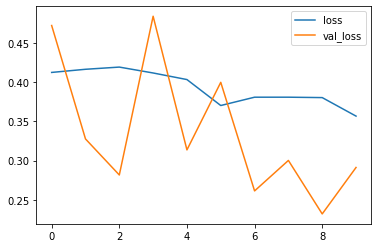

<Figure size 432x288 with 0 Axes>

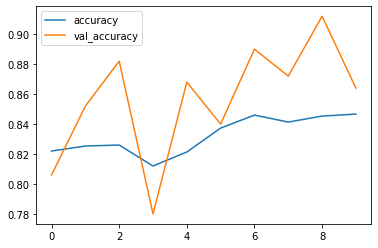

In [ ]:
plot_model_performance(history_4)

Let's try to change the architectuer of the model
add more filters to the conv2d layers

In [ ]:
from matplotlib.cbook import flatten
model_5 = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(input_shape=(200,200,3),
                                 filters=20,
                                 kernel_size=3,
                                 activation="relu"),
          tf.keras.layers.Conv2D(20,3,activation="relu"),
          tf.keras.layers.MaxPooling2D(2),

          tf.keras.layers.Conv2D(20,3,activation="relu"),
          tf.keras.layers.Conv2D(20,3,activation="relu"),
          tf.keras.layers.MaxPooling2D(2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                metrics=["accuracy"],
                optimizer="adam")

              



In [ ]:
history_5 = model_5.fit(train_augmented_data,
            validation_data=test_data,
            steps_per_epoch=len(train_augmented_data),
            validation_steps = len(test_data),
            epochs=10)

Epoch 1/10
47/47 [==============================] - 22s 454ms/step - loss: 0.6392 - accuracy: 0.6053 - val_loss: 0.4673 - val_accuracy: 0.8200
Epoch 2/10
47/47 [==============================] - 21s 441ms/step - loss: 0.5340 - accuracy: 0.7380 - val_loss: 0.3746 - val_accuracy: 0.8400
Epoch 3/10
47/47 [==============================] - 22s 474ms/step - loss: 0.5086 - accuracy: 0.7500 - val_loss: 0.5023 - val_accuracy: 0.7180
Epoch 4/10
47/47 [==============================] - 21s 442ms/step - loss: 0.4709 - accuracy: 0.7927 - val_loss: 0.3149 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 21s 442ms/step - loss: 0.4503 - accuracy: 0.7973 - val_loss: 0.3214 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 21s 444ms/step - loss: 0.4426 - accuracy: 0.8000 - val_loss: 0.2904 - val_accuracy: 0.8920
Epoch 7/10
47/47 [==============================] - 23s 480ms/step - loss: 0.4371 - accuracy: 0.8100 - val_loss: 0.2623 - val_accuracy: 0.8860

#Multiclass calssification using CNNs!

We will try to scale up classifying 10 classes od data

1.get and visualize the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

#extract the dat the data
import zipfile
File_path = "/content/10_food_classes_all_data.zip"

zipped = zipfile.ZipFile(File_path)
zipped.extractall()
zipped.close()

--2022-08-08 15:16:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   275MB/s    in 1.8s    

2022-08-08 15:16:18 (275 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
for root, dirs, files in os.walk("/content/10_food_classes_all_data"):
  print(f"in directory {root} there are {len(files)} files\n subdirectories are: {dirs}")
  

in directory /content/10_food_classes_all_data there are 0 files
 subdirectories are: ['train', 'test']
in directory /content/10_food_classes_all_data/train there are 0 files
 subdirectories are: ['pizza', 'grilled_salmon', 'hamburger', 'steak', 'chicken_curry', 'ramen', 'sushi', 'fried_rice', 'chicken_wings', 'ice_cream']
in directory /content/10_food_classes_all_data/train/pizza there are 750 files
 subdirectories are: []
in directory /content/10_food_classes_all_data/train/grilled_salmon there are 750 files
 subdirectories are: []
in directory /content/10_food_classes_all_data/train/hamburger there are 750 files
 subdirectories are: []
in directory /content/10_food_classes_all_data/train/steak there are 750 files
 subdirectories are: []
in directory /content/10_food_classes_all_data/train/chicken_curry there are 750 files
 subdirectories are: []
in directory /content/10_food_classes_all_data/train/ramen there are 750 files
 subdirectories are: []
in directory /content/10_food_classe

In [ ]:
#Let's save the classes names into a variable
classes_names = os.walk(dirs infor"/10_food_classes_all_data/train")

In [ ]:
[x[0].split("/")[2] for x in os.walk("10_food_classes_all_data/train")]

SyntaxError: ignored